In [1]:
import pandas as pd

df = pd.read_csv('lastfm-2k/user_friends.csv', sep='\t', na_filter=False)
#df = df.drop(['Unnamed: 0'], axis=1)
df

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831
...,...,...
25429,2099,1801
25430,2099,2006
25431,2099,2016
25432,2100,586


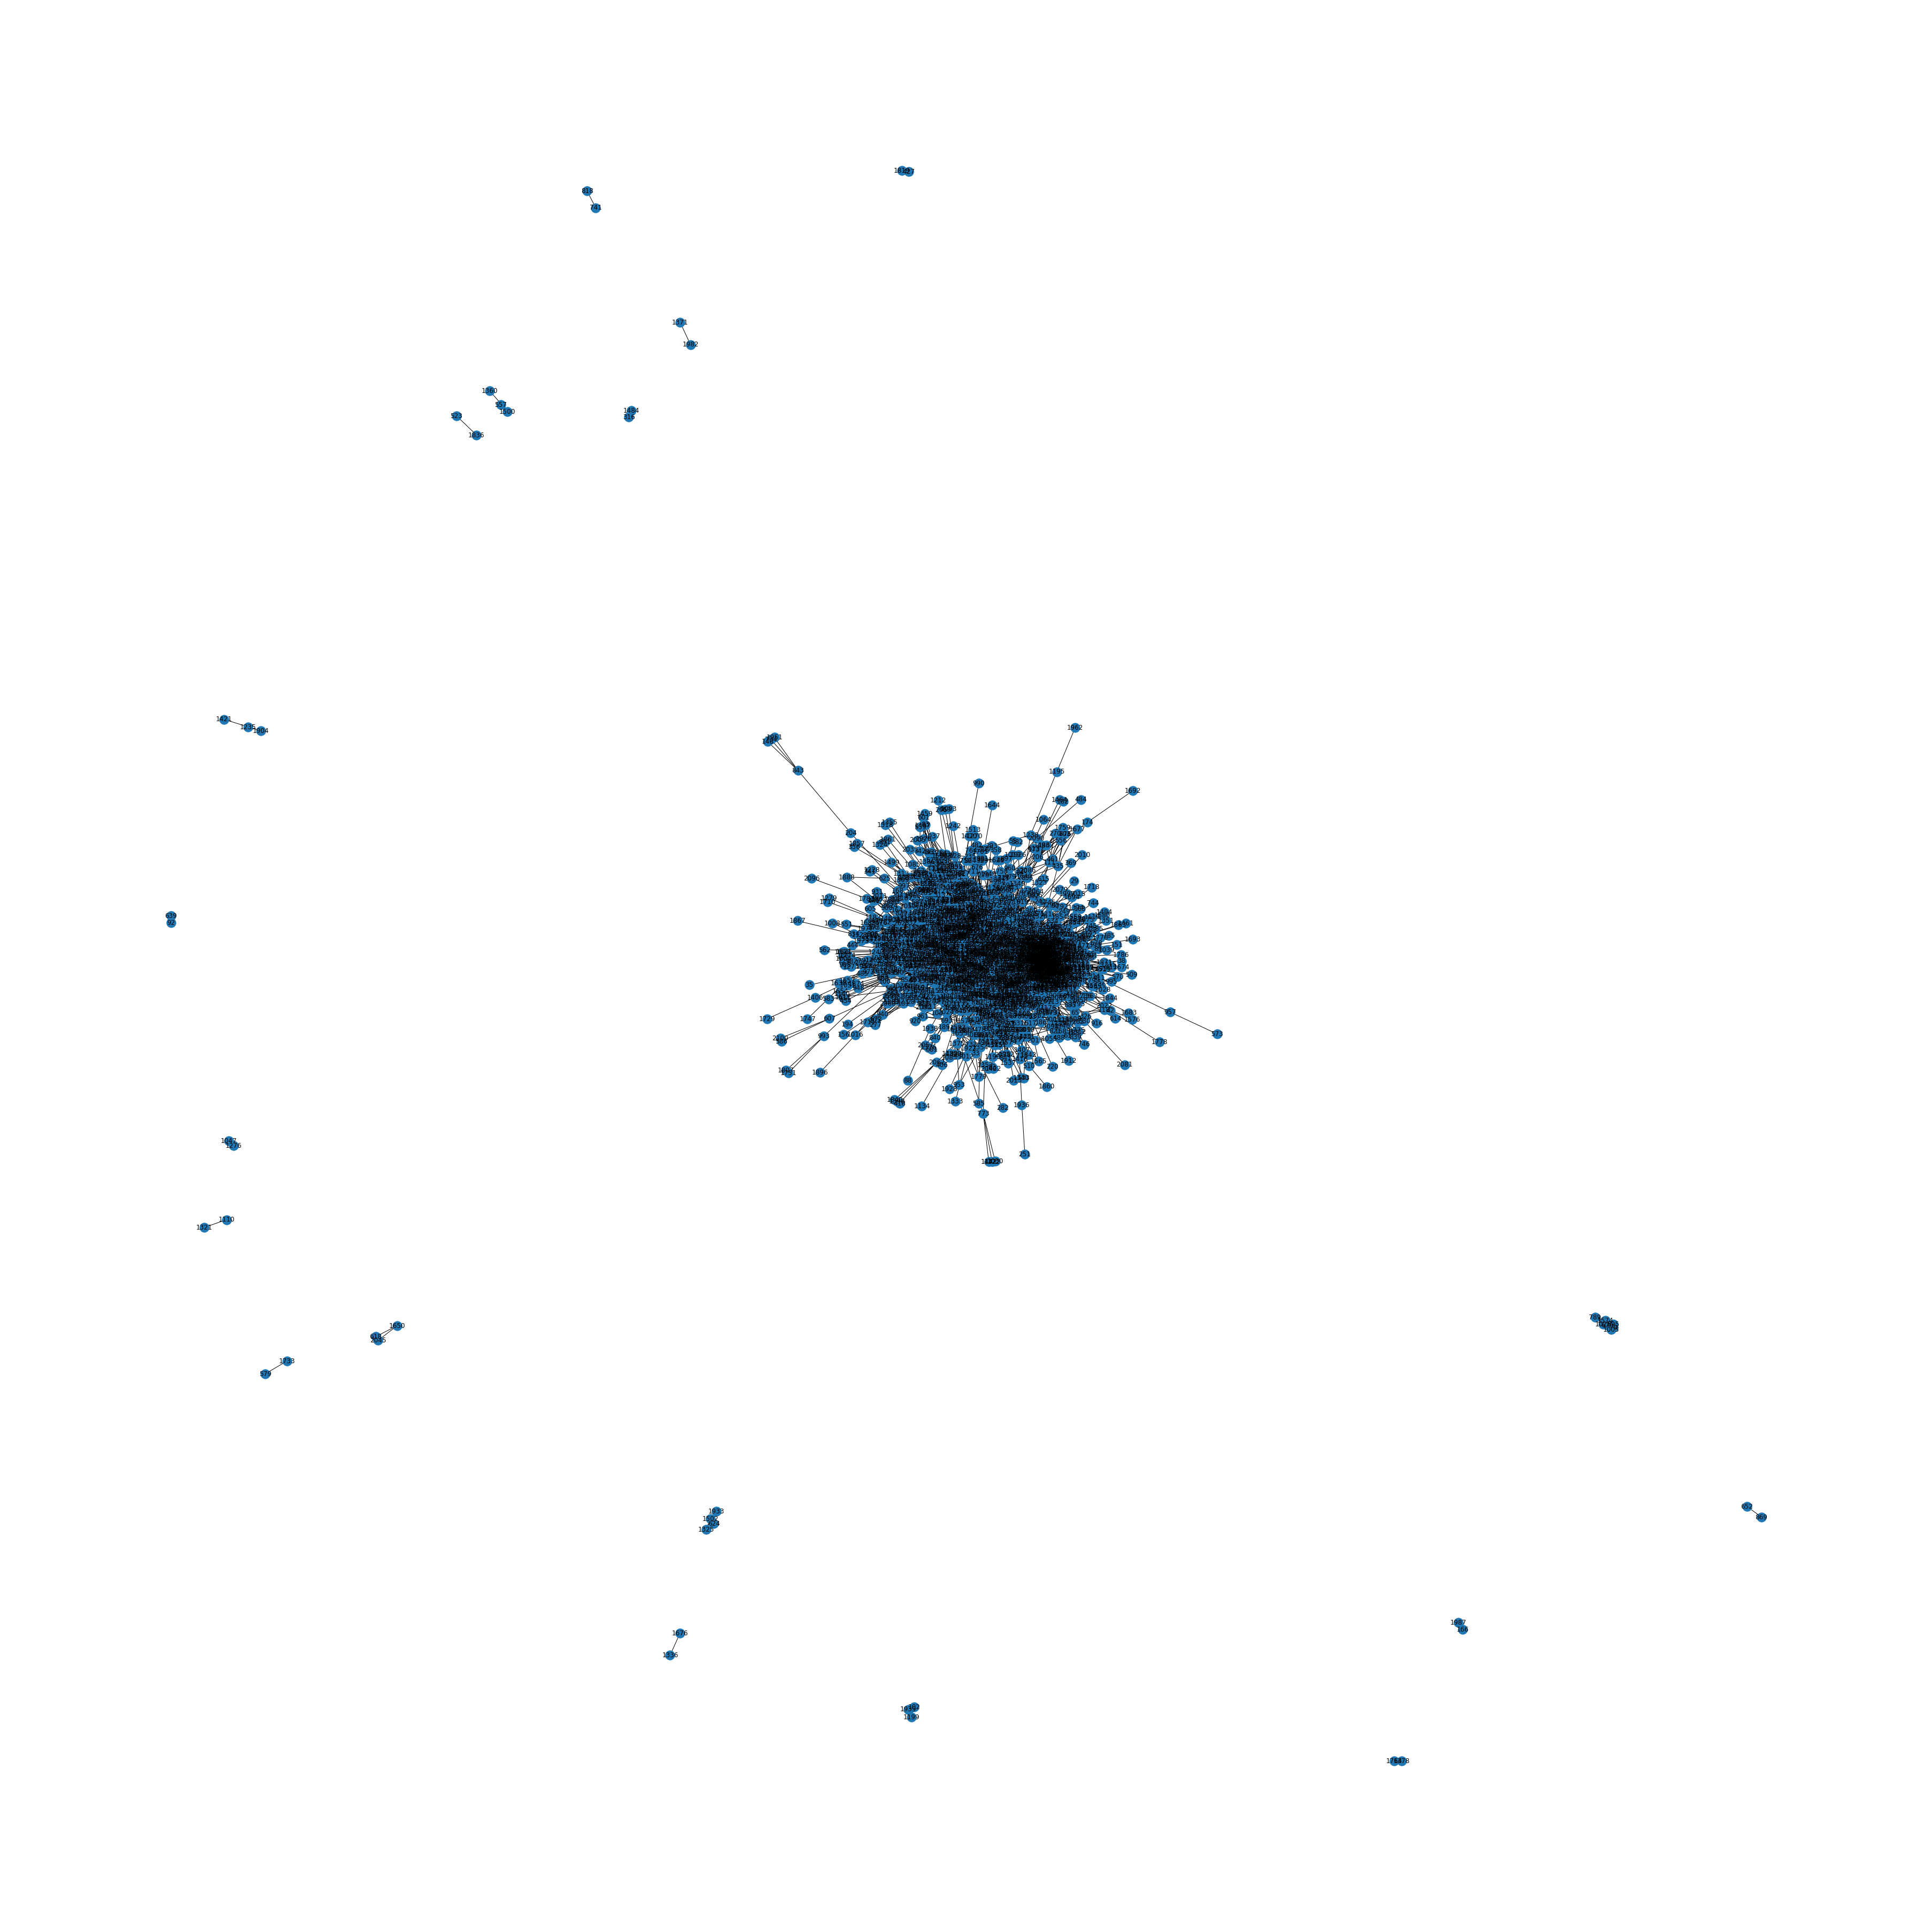

In [2]:
# user-friend graph
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [50,50]

df = pd.read_csv('lastfm-2k/user_friends.csv', sep='\t', na_filter=False)

G = nx.from_pandas_edgelist(df, 'userID','friendID')  
nx.draw(G, with_labels=True)
plt.show()

In [3]:
## degree centrality

deg_centrality = nx.degree_centrality(G)
print(len(deg_centrality))

deg_centrality = pd.DataFrame.from_dict(deg_centrality, orient='index', columns=['degree'])
deg_centrality = deg_centrality.sort_values(by=['degree'], ascending=False) # degree 높은 순으로 정렬
# print(deg_centrality)

deg_centrality.head(10) # degree 높은 10명

1892


,degree
1543,0.062930
1281,0.058170
831,0.056055
179,0.051296
1503,0.050238
1023,0.048123
405,0.047594
1895,0.047594
1300,0.047065
390,0.046536


In [4]:
# closeness centrality
close_centrality = nx.closeness_centrality(G)
print(len(close_centrality))

close_centrality = pd.DataFrame.from_dict(close_centrality, orient='index', columns=['closeness'])
close_centrality = close_centrality.sort_values(by=['closeness'], ascending=False) # closeness 높은 순으로 정렬
# print(close_centrality)

close_centrality.head(10) # closeness 높은 10명

1892


,closeness
831,0.402212
1543,0.396699
1281,0.389804
143,0.380949
1895,0.376789
1130,0.373107
1503,0.373029
1879,0.372332
59,0.371792
730,0.368358


In [5]:
# betweeness centrality
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False)
print(len(bet_centrality))

bet_centrality = pd.DataFrame.from_dict(bet_centrality, orient='index', columns=['betweeness'])
bet_centrality = bet_centrality.sort_values(by=['betweeness'], ascending=False) # betweeness 높은 순으로 정렬
# print(bet_centrality)

bet_centrality.head(10) # betweeness 높은 10명

1892


,betweeness
1543,0.066527
1281,0.054549
831,0.048691
1258,0.043025
78,0.029337
1213,0.024167
1130,0.023799
1503,0.023197
298,0.023113
1597,0.021753


In [6]:
# page rank
pr = nx.pagerank(G, alpha = 0.8)
# alpha 값 보통 0.8~0.9 사이의 값으로 설정
print(len(pr))

pr = pd.DataFrame.from_dict(pr, orient='index', columns=['rank'])
pr = pr.sort_values(by=['rank'], ascending=False) # pagerank 높은 순으로 정렬
# print(pr)

pr.head(10) # pagerank 높은 10명

1892


,rank
78,0.005397
1543,0.005144
1281,0.004628
1258,0.004203
1210,0.003873
831,0.003586
298,0.002993
1488,0.002891
1213,0.002780
1597,0.002750
